In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [15]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('frauds', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536804376.0
2018-09-12 19:06:16
Senator Abel Nazario Quiñones Indicted And Arrested For Falsifying Documents And Wire Fraud
45
2
1536794074.0
2018-09-12 16:14:34
Man jailed in Italy for selling fake TripAdvisor reviews
24
3
1536781962.0
2018-09-12 12:52:42
Witness in Pa. casino fraud case turns up dead in creek
3333
4
1536334515.0
2018-09-07 08:35:15
RMV issued 1,900 drivers’ licenses to dead people, audit finds
108
5
1536278639.0
2018-09-06 17:03:59
Former Arkansas State Senator Sentenced To 220 Months In Federal Prison For Wire Fraud, Mail Fraud And Money Laundering
3602
6
1535770257.0
2018-08-31 19:50:57
Arkansas State Senator Jeremy Hutchinson Indicted on Wire and Tax Fraud Charges | OPA
2527
7
1535699503.0
2018-08-31 00:11:43
Texas woman sentenced to five years for voting in the last election.
39
8
1535014639.0
2018-08-23 01:57:19
Rutgers' Edwin Lopez, charged in credit card fraud scheme, had drug and gun charges downgraded to $500 fine
72
9
1535004950.0
2018-08-22 23

101
1512866525.0
2017-12-09 16:42:05
Judge orders man to serve 29 months after he pleads guilty to online fraud
12
102
1512806773.0
2017-12-09 00:06:13
Steve Harvey Sued: Charity Fraud Lawsuit Accuses $20 Million Not Paid
909
103
1512299979.0
2017-12-03 03:19:39
Michigan man sentenced to prison for scamming Unemployment Insurance Agency out of more than $726K
87
104
1512030935.0
2017-11-30 00:35:35
Honduran Elections under fraud allegations, "Mr Nasralla had been five points ahead of the incumbent, Juan Orlando Hernández, on Monday when the court stopped updating its website."
14
105
1511869137.0
2017-11-28 03:38:57
South El Monte lawyer pleads guilty to $50M EB-5 visa-fraud scheme in San Gabriel
36
106
1511705037.0
2017-11-26 06:03:57
Florida jail guard fired, accused of fraud
20
107
1511578808.0
2017-11-24 19:00:08
Macy's reportedly experiencing credit card problems
219
108
1511347800.0
2017-11-22 02:50:00
JPMorgan reportedly getting into bitcoin futures trading even though Dimon bel

In [16]:
#Give name
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536804e+09,2018-09-12 19:06:16,Senator Abel Nazario Quiñones Indicted And Arr...,45
1,1.536794e+09,2018-09-12 16:14:34,Man jailed in Italy for selling fake TripAdvis...,24
2,1.536782e+09,2018-09-12 12:52:42,Witness in Pa. casino fraud case turns up dead...,3333
3,1.536335e+09,2018-09-07 08:35:15,"RMV issued 1,900 drivers’ licenses to dead peo...",108
4,1.536279e+09,2018-09-06 17:03:59,Former Arkansas State Senator Sentenced To 220...,3602
5,1.535770e+09,2018-08-31 19:50:57,Arkansas State Senator Jeremy Hutchinson Indic...,2527
6,1.535700e+09,2018-08-31 00:11:43,Texas woman sentenced to five years for voting...,39
7,1.535015e+09,2018-08-23 01:57:19,"Rutgers' Edwin Lopez, charged in credit card f...",72
8,1.535005e+09,2018-08-22 23:15:50,8 Rutgers football players charged in credit c...,39
9,1.534748e+09,2018-08-19 23:59:49,"Cohen, Trump’s Ex-Lawyer, Investigated for Ban...",2832


In [17]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [18]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,2,1.536782e+09,2018-09-12 12:52:42,Witness in Pa. casino fraud case turns up dead...,3333
1,3,1.536335e+09,2018-09-07 08:35:15,"RMV issued 1,900 drivers’ licenses to dead peo...",108
2,4,1.536279e+09,2018-09-06 17:03:59,Former Arkansas State Senator Sentenced To 220...,3602
3,5,1.535770e+09,2018-08-31 19:50:57,Arkansas State Senator Jeremy Hutchinson Indic...,2527
4,9,1.534748e+09,2018-08-19 23:59:49,"Cohen, Trump’s Ex-Lawyer, Investigated for Ban...",2832
5,10,1.534373e+09,2018-08-15 15:37:51,Members of Tesla's board of directors are lawy...,163
6,13,1.534289e+09,2018-08-14 16:19:18,Worldwide ATM hack could see millions withdraw...,174
7,14,1.533976e+09,2018-08-11 01:26:11,Tesla CEO Musk accused in lawsuit of fraud ove...,91
8,15,1.533707e+09,2018-08-07 22:40:47,Ex-Trump lawyer Cohen under investigation for ...,97
9,16,1.533526e+09,2018-08-05 20:34:42,"Whistleblower: Wells Fargo fraud ""could have b...",4921


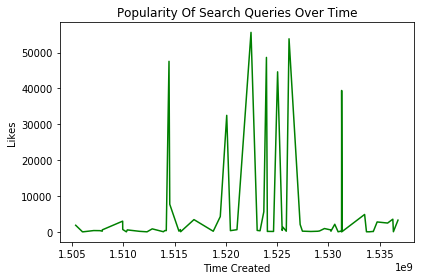

In [19]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()